# Step 2: Data Cleaning and Preparation
### At here step, we will clean and prepare the data for the next step. We will do the following steps: 
1. Fixing invalid values
2. Checking duplicates and removing them 
3. Checking missing values and removing them

#### Importing libraries needed for this step


In [92]:
import numpy as np
import pandas as pd

#### Reading the data 

In [93]:
tiki_data = pd.read_csv('../../../data/raw/products_detail.csv')   
tiki_data.head()

,p_id,p_name,p_id_shop,p_shop_name,p_brand,p_categories,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,118966833,Móc Treo Cây Lau Nhà Dán Tường Đa Năng Chịu L...,96639.0,Parroti Store,Parroti,"Giá, móc, cây treo",3769,42000,23900,43
1,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,1.0,Tiki Trading,Lock&Lock,Bình giữ nhiệt,12430,528000,265000,50
2,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,1.0,Tiki Trading,Lock&Lock,Bình giữ nhiệt,9567,473000,243000,49
3,73124602,Bình Giữ Nhiệt Bằng Thép Không Gỉ Lock&Lock Va...,1.0,Tiki Trading,Lock&Lock,Nhà Cửa - Đời Sống,34920,677000,339000,50
4,53583472,Bộ Hộp Cơm Giữ Nhiệt Lock&Lock Easy Carry 2L L...,1.0,Tiki Trading,Lock&Lock,Nhà Cửa - Đời Sống,9501,1667000,834000,50


#### Understanding the data 

In [94]:
tiki_data.shape

(1974, 10)

In [95]:
tiki_data.describe()

,p_id,p_id_shop,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
count,1.974000e+03,1966.000000,1974.000000,1.974000e+03,1.974000e+03,1974.000000
mean,1.034886e+08,109168.089013,720.616515,2.726703e+05,2.084191e+05,14.721378
std,6.117190e+07,93967.561518,2068.596611,4.533643e+05,3.246342e+05,18.831565
min,3.728490e+05,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.385458e+07,17480.000000,31.000000,5.800000e+04,5.000000e+04,0.000000
50%,1.046812e+08,97441.000000,151.000000,1.390000e+05,1.190000e+05,0.000000
75%,1.603094e+08,180001.500000,589.750000,3.087500e+05,2.477500e+05,32.000000
max,2.052945e+08,310760.000000,36742.000000,5.800000e+06,4.207000e+06,72.000000


In [96]:
tiki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p_id              1974 non-null   int64  
 1   p_name            1974 non-null   object 
 2   p_id_shop         1966 non-null   float64
 3   p_shop_name       1966 non-null   object 
 4   p_brand           1974 non-null   object 
 5   p_categories      1966 non-null   object 
 6   p_sold_quantity   1974 non-null   int64  
 7   p_original_price  1974 non-null   int64  
 8   p_current_price   1974 non-null   int64  
 9   p_discount_rate   1974 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 154.3+ KB


In [97]:
# split category from p_categories column 
category = tiki_data['p_categories'].str.split(',', expand=True)
tiki_data.insert(2, 'p_category', category[0])
tiki_data.drop(['p_categories'], axis=1, inplace=True)
tiki_data.head()

,p_id,p_name,p_category,p_id_shop,p_shop_name,p_brand,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,118966833,Móc Treo Cây Lau Nhà Dán Tường Đa Năng Chịu L...,Giá,96639.0,Parroti Store,Parroti,3769,42000,23900,43
1,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,1.0,Tiki Trading,Lock&Lock,12430,528000,265000,50
2,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,Lock&Lock,9567,473000,243000,49
3,73124602,Bình Giữ Nhiệt Bằng Thép Không Gỉ Lock&Lock Va...,Nhà Cửa - Đời Sống,1.0,Tiki Trading,Lock&Lock,34920,677000,339000,50
4,53583472,Bộ Hộp Cơm Giữ Nhiệt Lock&Lock Easy Carry 2L L...,Nhà Cửa - Đời Sống,1.0,Tiki Trading,Lock&Lock,9501,1667000,834000,50


#### 1. Fixing invalid values

In [98]:
tiki_data['p_name'].unique()

array(['Móc Treo Cây Lau Nhà Dán Tường Đa Năng  Chịu Lực Tốt - Parroti Keeper KP02',
       'Bình Giữ Nhiệt Lock&Lock Energetic One-Touch Tumbler LHC3249 - 550ML',
       'Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC4269 540ml', ...,
       'Combo 5 cuộn túi đựng rác tự phân hủy nhiều màu',
       'COMBO 03 LÕI THAY THẾ CÂY LĂN BỤI COLOCOLO (CÁN NGẮN VÀ CÁN DÀI)',
       'Đồng hồ nước - Đồng hồ nước sinh hoạt'], dtype=object)

<AxesSubplot:>

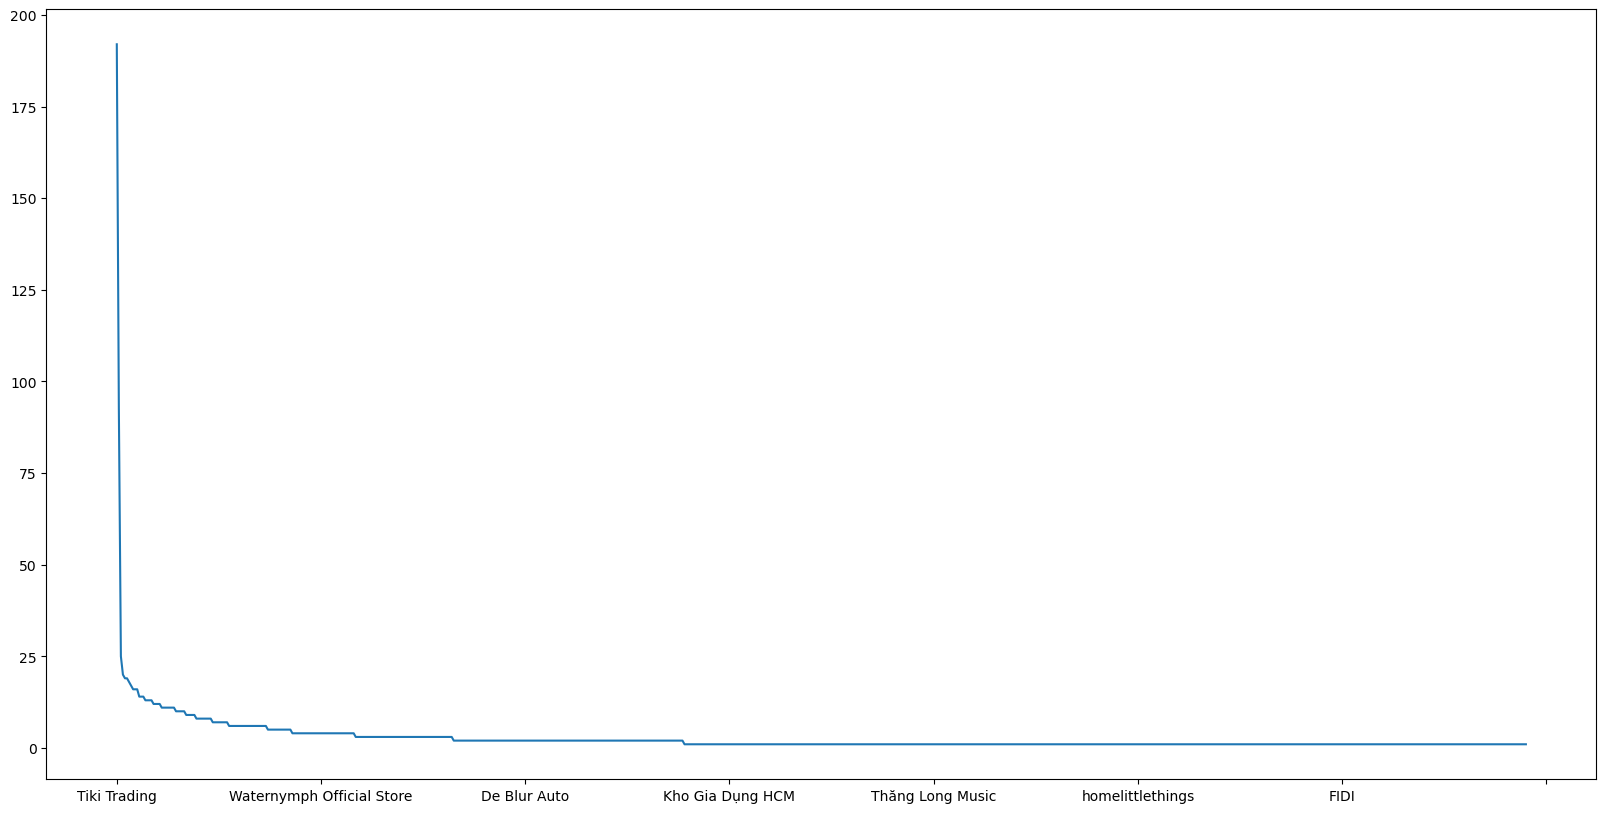

In [99]:
tiki_data['p_shop_name'].value_counts().plot(kind='line', figsize=(20, 10)) 

In [100]:
tiki_data['p_category'].unique()

array(['Giá', 'Bình giữ nhiệt', 'Nhà Cửa - Đời Sống', 'Root',
       'Dụng cụ lau nhà khác', 'Dụng cụ xay', 'Hạt giống', 'Bàn chải',
       'Nội thất phòng học', 'Bàn ghế làm việc', 'Bộ ga', 'Ổ cắm',
       'Chảo các loại', 'Kệ & Tủ', 'Túi đựng rác', 'Hộp đựng thực phẩm',
       'Chăn', 'Ly', 'Khác', 'Chiếu', 'Dụng cụ Cắt-Gọt-Bào',
       'Bình đựng nước', 'Đèn pin', 'Phụ kiện nhà bếp khác',
       'Bảo hộ lao động', 'Gối các loại', 'Khăn', 'Dụng cụ vệ sinh khác',
       'Túi giặt', 'Hũ', 'Pin tiểu', 'Chổi', 'Thảm chùi chân',
       'Kệ nhà tắm', 'Rèm', 'Áo mưa', 'Phụ kiện phòng ngủ khác',
       'Máy vặn vít', 'Giỏ đựng quần áo', 'Vòi nước và phụ kiện tưới cây',
       'Túi', 'Đèn bàn', 'Cây lăn bụi', 'CHƯƠNG TRÌNH KHUYẾN MẠI KHÁC',
       'Đèn diệt côn trùng', 'Tủ', nan, 'Ruột gối',
       'Trang trí nhà cửa khác', 'Đèn ngoài trời', 'Hương', 'Đèn khác',
       'Súng bắn keo', 'Nồi các loại', 'Dụng cụ diệt côn trùng khác',
       'Phụ kiện phòng ngủ', 'Phụ kiện nệm', 'Cân nhà bếp', 'T

#### As we can see, there is a category named root, it is not meant as a category

In [101]:
# count number of category have name 'Root'
tiki_data['p_category'].value_counts()['Root']

166

#### The number of categories named Root is quite large (166/2000), but to avoid data confusion, we will delete it.

In [102]:
# drop row have category name 'Root'
tiki_data = tiki_data[tiki_data['p_category'] != 'Root']

#### As we know, in terms of product price (p_original_price) there is almost no price of 0. So we will check our data has such values.

In [103]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, :])

count

p_id                                                        141298295
p_name              5 Hạt giống đậu bắp xanh cao sản - Làm vườn cự...
p_category                                                  Hạt giống
p_id_shop                                                     42056.0
p_shop_name                                                   KoyShop
p_brand                                                           OEM
p_sold_quantity                                                   345
p_original_price                                                    0
p_current_price                                                     0
p_discount_rate                                                     0
Name: 11, dtype: object
p_id                                                        141298313
p_name              Hạt giống mướp hương Việt Nam siêu thơm - Làm ...
p_category                                                  Hạt giống
p_id_shop                                                     4205

13

#### As we can see above, the products have a price(p_original_price) of 0. So we will delete these rows.

In [104]:
# drop row have p_original_price = 0
tiki_data = tiki_data[tiki_data['p_original_price'] != 0]

In [105]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, :])

count

0

### 2. Checking duplicates and removing them

<AxesSubplot:>

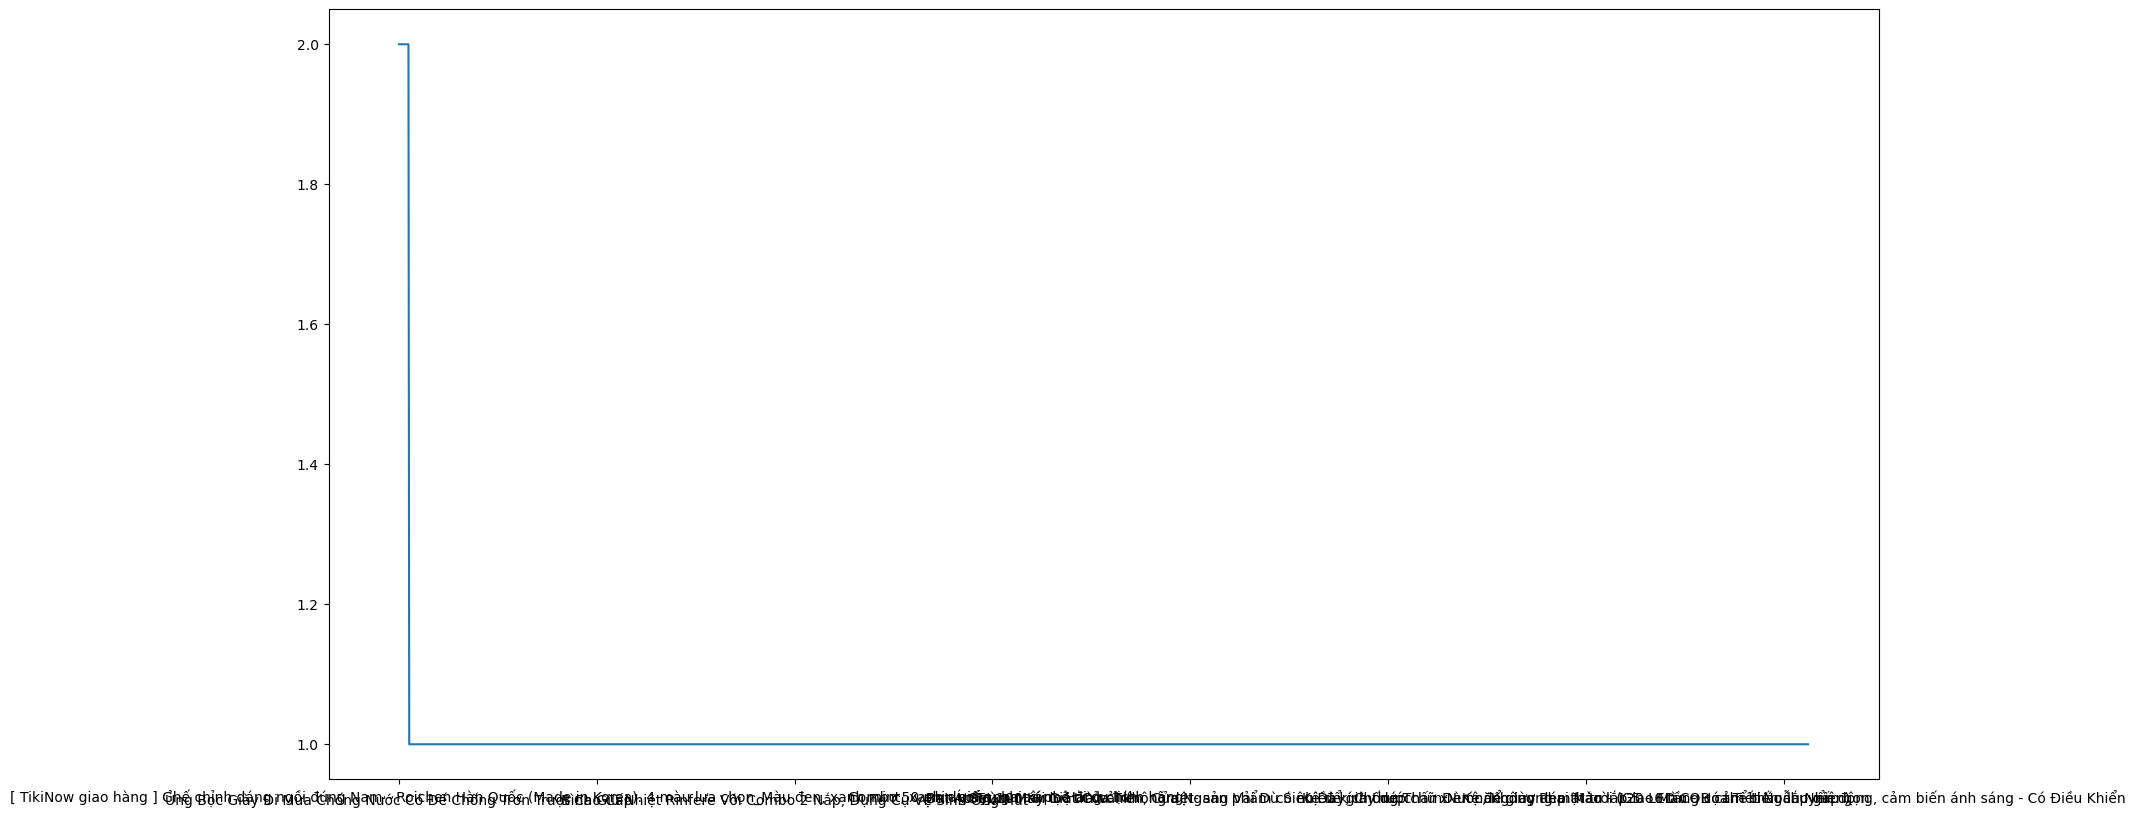

In [106]:
tiki_data['p_name'].value_counts().plot(kind='line', figsize=(20, 10))


#### We see that the number of identical elements of the name column is only 1!!! so keeping it as it is won't mess up the data

### 3. Checking missing values and removing them

In [107]:
tiki_data.isnull().sum()

p_id                0
p_name              0
p_category          0
p_id_shop           0
p_shop_name         0
p_brand             0
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

#### When displaying the above table, because the number of missing values is very small, and the numbers are the same (both are 8). Predict it on the same 8 rows. We will try to delete the missing values of p_id_shop to see if there are still missing values?

In [108]:
tiki_data.dropna(subset=['p_id_shop'], inplace=True)
tiki_data.isnull().sum()


p_id                0
p_name              0
p_category          0
p_id_shop           0
p_shop_name         0
p_brand             0
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

#### As expected, deleting rows where p_id_shop is null also deletes rows where p_shop_name and p_category are null. So the above prediction is correct.

### 4. Save data after preprocessing

In [109]:
#save data to csv file
tiki_data.to_csv('../../../data/processed/tiki_data.csv', index=False)